In [ ]:
# https://www.kaggle.com/iamsouravbanerjee/animal-image-dataset-90-different-animals

In [ ]:
!wget https://ziqin.blob.core.windows.net/tf-ziqin/archive.zip

--2021-12-10 09:59:52--  https://ziqin.blob.core.windows.net/tf-ziqin/archive.zip
Resolving ziqin.blob.core.windows.net (ziqin.blob.core.windows.net)... 52.239.221.226
Connecting to ziqin.blob.core.windows.net (ziqin.blob.core.windows.net)|52.239.221.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 687914671 (656M) [application/x-zip-compressed]
Saving to: ‘archive.zip’

archive.zip         100%[===================>] 656.05M  5.86MB/s    in 2m 26s  

2021-12-10 10:02:20 (4.48 MB/s) - ‘archive.zip’ saved [687914671/687914671]



In [ ]:
!unzip "archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

DIR = "/content/animals/animals"

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    DIR,
    batch_size=32,
    image_size=(224, 224),
    subset='training',
    validation_split=0.2, # 1 - x
    seed=42
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    DIR,
    batch_size=32,
    image_size=(224, 224),
    subset='validation',
    validation_split=0.2,
    seed=42
)

Found 5400 files belonging to 90 classes.
Using 4320 files for training.
Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


In [ ]:
train_dataset, validation_dataset

(<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>)

In [ ]:
class_names = train_dataset.class_names
class_names

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [ ]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset, validation_dataset

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>)

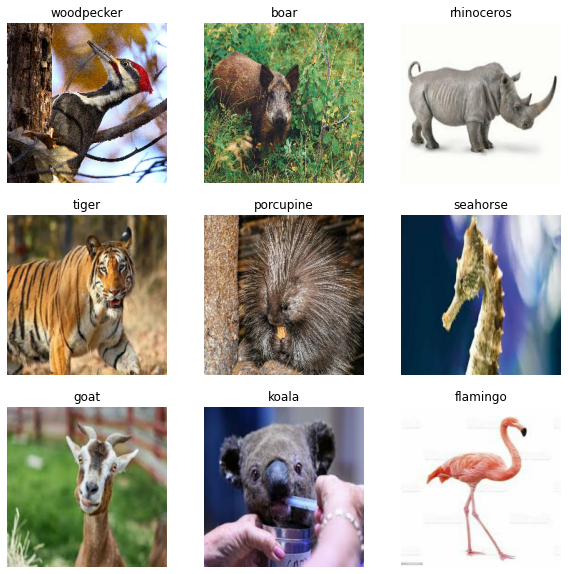

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for images, labels in train_dataset.take(1):
  print(tf.reduce_min(images[0]), tf.reduce_max(images[0]))
  break

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(254.8141, shape=(), dtype=float32)


In [ ]:
model_0 = tf.keras.Sequential([
  layers.Input(shape=(224, 224, 3)),
  layers.Rescaling(1/255.),
  layers.Conv2D(32, 3, activation='relu'),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(90, activation='softmax')
])
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 121000)            0         
                                                                 
 dense (Dense)               (None, 90)                10890090  
                                                        

In [ ]:
model_0.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history_model_0 = model_0.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset
)

Epoch 1/5
135/135 [==============================] - 35s 188ms/step - loss: 4.5610 - accuracy: 0.0815 - val_loss: 3.9348 - val_accuracy: 0.1472
Epoch 2/5
135/135 [==============================] - 26s 184ms/step - loss: 1.7146 - accuracy: 0.6567 - val_loss: 3.6456 - val_accuracy: 0.2954
Epoch 3/5
135/135 [==============================] - 26s 187ms/step - loss: 0.1599 - accuracy: 0.9780 - val_loss: 4.4895 - val_accuracy: 0.3000
Epoch 4/5
135/135 [==============================] - 26s 188ms/step - loss: 0.0303 - accuracy: 0.9975 - val_loss: 4.6239 - val_accuracy: 0.3046
Epoch 5/5
135/135 [==============================] - 27s 189ms/step - loss: 0.0095 - accuracy: 0.9993 - val_loss: 4.7742 - val_accuracy: 0.3046


In [ ]:
x = tf.keras.applications.EfficientNetB0(include_top=True)
len(x.layers), x.layers

21848064/21834768 [==============================] - 0s 0us/step


(240,
  <keras.layers.core.dense.Dense at 0x7f7ef8a19c50>])

In [ ]:
x = tf.keras.applications.EfficientNetB0(include_top=False)

len(x.layers), x.layers

16719872/16705208 [==============================] - 0s 0us/step


(237,
  <keras.layers.core.activation.Activation at 0x7f7ef8189890>])

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model, base_model.trainable

(<keras.engine.functional.Functional at 0x7f7ef7cfefd0>, True)

In [ ]:
base_model.trainable = False

In [ ]:
input = layers.Input(shape=(224, 224, 3))
x = base_model(input)
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(90, activation='softmax')(x)

model_1 = tf.keras.Model(input, output)
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 90)                115290    
                                                                 
Total params: 4,164,861
Trainable params: 115,290
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_1.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
history_1 = model_1.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset
)

Epoch 1/5
135/135 [==============================] - 39s 223ms/step - loss: 2.1488 - accuracy: 0.6470 - val_loss: 0.8735 - val_accuracy: 0.8519
Epoch 2/5
135/135 [==============================] - 29s 208ms/step - loss: 0.5382 - accuracy: 0.9213 - val_loss: 0.5215 - val_accuracy: 0.8861
Epoch 3/5
135/135 [==============================] - 29s 207ms/step - loss: 0.3059 - accuracy: 0.9551 - val_loss: 0.4184 - val_accuracy: 0.8963
Epoch 4/5
135/135 [==============================] - 29s 207ms/step - loss: 0.2066 - accuracy: 0.9725 - val_loss: 0.3624 - val_accuracy: 0.9065
Epoch 5/5
135/135 [==============================] - 29s 209ms/step - loss: 0.1451 - accuracy: 0.9861 - val_loss: 0.3300 - val_accuracy: 0.9102


In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 90)                115290    
                                                                 
Total params: 4,164,861
Trainable params: 115,290
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_1.trainable = True

In [ ]:
len(model_1.layers[1].layers)

237

In [ ]:
for layer in base_model.layers[:200]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
model_1.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [ ]:
model_1.fit(
    train_dataset,
    epochs=10,
    initial_epoch=history_1.epoch[-1],
    validation_data=validation_dataset
)

Epoch 5/10
135/135 [==============================] - 40s 230ms/step - loss: 0.2335 - accuracy: 0.9690 - val_loss: 0.3066 - val_accuracy: 0.9074
Epoch 6/10
135/135 [==============================] - 31s 219ms/step - loss: 0.1149 - accuracy: 0.9870 - val_loss: 0.2913 - val_accuracy: 0.9093
Epoch 7/10
135/135 [==============================] - 31s 221ms/step - loss: 0.0773 - accuracy: 0.9931 - val_loss: 0.2822 - val_accuracy: 0.9120
Epoch 8/10
135/135 [==============================] - 31s 218ms/step - loss: 0.0574 - accuracy: 0.9951 - val_loss: 0.2720 - val_accuracy: 0.9139
Epoch 9/10
135/135 [==============================] - 31s 218ms/step - loss: 0.0474 - accuracy: 0.9956 - val_loss: 0.2618 - val_accuracy: 0.9148
Epoch 10/10
135/135 [==============================] - 31s 218ms/step - loss: 0.0372 - accuracy: 0.9970 - val_loss: 0.2643 - val_accuracy: 0.9148


In [ ]:
model_1.evaluate(validation_dataset)

34/34 [==============================] - 6s 155ms/step - loss: 0.2643 - accuracy: 0.9148


[0.2642858624458313, 0.914814829826355]

In [ ]:
model_1_pred_prob = model_1.predict(validation_dataset)

In [ ]:
model_1_pred = tf.argmax(model_1_pred_prob, axis=1)
model_1_pred

<tf.Tensor: shape=(1080,), dtype=int64, numpy=array([38, 86,  6, ..., 44, 48, 25])>

In [ ]:
validation_dataset.take(1)

<TakeDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
import requests

def predict_image_from_url(url):
  image = tf.image.decode_image(requests.get(url).content)
  image = tf.image.resize(image, size=[224, 224])
  pred = model_1.predict(tf.expand_dims(image, axis=0))
  return class_names[tf.argmax(pred[0])]

In [ ]:
predict_image_from_url("https://cdn.techozu.com/wp/2021/08/How-to-Install-and-Set-Up-MetaMask-on-PC-and-Mobile.jpg")

'fox'

In [ ]:
model_1.input_shape

(None, 224, 224, 3)

In [ ]:
# pred = model_1.predict(tf.expand_dims(image, axis=0))
# class_names[tf.argmax(pred[0])]

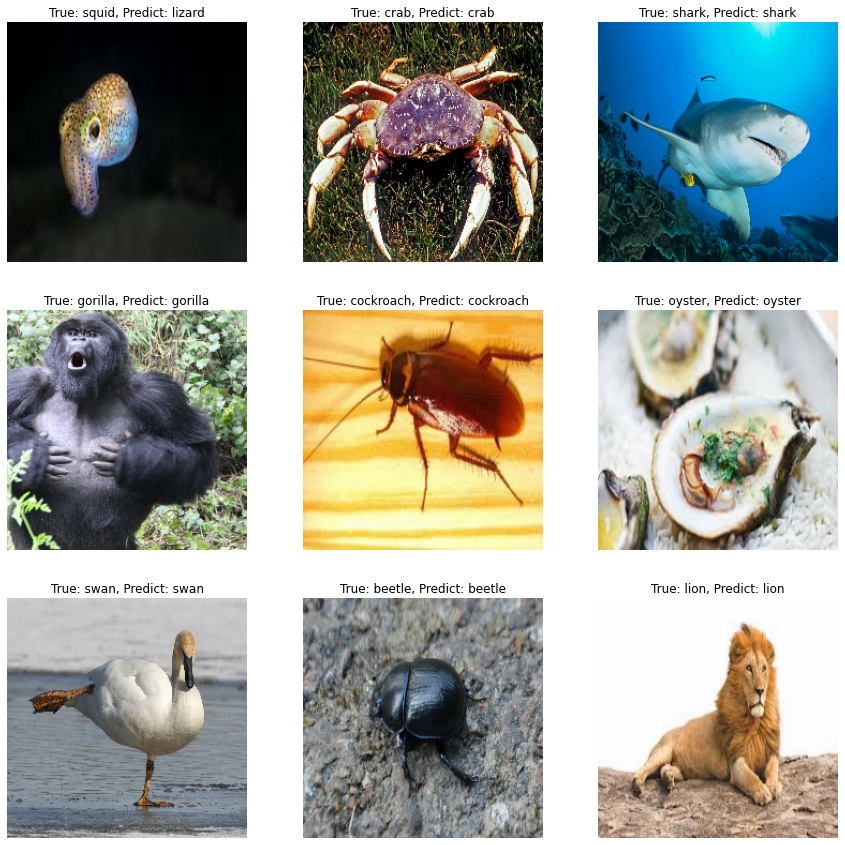

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(1):
  for i in range(9):
    pred_probs = model_1.predict(tf.expand_dims(images[i], axis=0))
    pred = tf.argmax(pred_probs[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    title = f"True: {class_names[labels[i]]}, Predict: {class_names[pred]}"
    plt.title(title)
    plt.axis("off")

In [ ]:
model_1.save("model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
# Install Tensorflow.js
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 2.0 MB/s 


In [ ]:
import tensorflowjs as tfjs

In [ ]:
# tfjs.converters.save_keras_model(model_1, "model")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


weight normalization_2/count with shape () and dtype int64 was auto converted to the type int32


In [ ]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model model.h5 model/

2021-12-10 10:17:30.421780: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2021-12-10 10:17:46.800214: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)
Writing w

In [ ]:
!zip -r "model.zip" "model"

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 96%)
  adding: model/group1-shard1of4.bin (deflated 7%)
  adding: model/group1-shard3of4.bin (deflated 7%)
  adding: model/group1-shard2of4.bin (deflated 7%)
  adding: model/group1-shard4of4.bin (deflated 7%)


In [ ]:
tf.argmax([0.004515837877988815, 0.01152735110372305, 0.017205363139510155, 0.016108127310872078, 0.011941003613173962, 0.008449203334748745, 0.010546396486461163, 0.01386124175041914, 0.010640813037753105, 0.017074430361390114, 0.016056980937719345, 0.008550812490284443, 0.010846557095646858, 0.013448436744511127, 0.013819129206240177, 0.007462458685040474, 0.00983940064907074, 0.011393454857170582, 0.012390381656587124, 0.007700271904468536, 0.012141010724008083, 0.008367897011339664, 0.015879632905125618, 0.01167695689946413, 0.005116826388984919, 0.007907587103545666, 0.010307158343493938, 0.006623573135584593, 0.013660759665071964, 0.00916455127298832, 0.00890283565968275, 0.010842414572834969, 0.008526300080120564, 0.007077971938997507, 0.013263178989291191, 0.011570639908313751, 0.00938285980373621, 0.009165240451693535, 0.010288318619132042, 0.010659283958375454, 0.009439506568014622, 0.008851973339915276, 0.009560970589518547, 0.01106574758887291, 0.010663681663572788, 0.005543924402445555, 0.010520602576434612, 0.01131073571741581, 0.011089133098721504, 0.008810595609247684, 0.01404549740254879, 0.014115046709775925, 0.017435407266020775, 0.00998802948743105, 0.006510890554636717, 0.011923985555768013, 0.016902422532439232, 0.013261266984045506, 0.013566949404776096, 0.00915499497205019, 0.011788317933678627, 0.006562488153576851, 0.01134768407791853, 0.020074261352419853, 0.01707128807902336, 0.010932601988315582, 0.017586996778845787, 0.015882013365626335, 0.016437653452157974, 0.012263640761375427, 0.008338739164173603, 0.005408064462244511, 0.01662052795290947, 0.011948302388191223, 0.007108471821993589, 0.011302487924695015, 0.007545117288827896, 0.010745398700237274, 0.01059232372790575, 0.012995045632123947, 0.009000330232083797, 0.01289363857358694, 0.008638584986329079, 0.011986714787781239, 0.009722787886857986, 0.008361993357539177, 0.01202442217618227, 0.009920733980834484, 0.011994242668151855, 0.005241109523922205])

<tf.Tensor: shape=(), dtype=int64, numpy=63>

In [ ]:
%%html
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <script src="https://cdn.tailwindcss.com"></script>
    <title>Animal Classification Model</title>
  </head>
  <body
    class="
      flex flex-col
      justify-center
      items-start
      max-w-3xl
      px-4
      py-8
      mx-auto
      2xl:max-w-5xl
    "
  >
    <input type="file" accept="image/*" id="file" hidden />
    <label
      htmlFor="file"
      className="flex flex-col items-center justify-center w-full p-6 mb-5 border rounded-md cursor-pointer"
    >
      <svg
        xmlns="http://www.w3.org/2000/svg"
        viewBox="0 0 24 24"
        width="48"
        height="48"
        className="mb-2 text-gray-600"
      >
        <path fill="none" d="M0 0h24v24H0z" />
        <path
          fill="currentColor"
          d="M17.409 19c-.776-2.399-2.277-3.885-4.266-5.602A10.954 10.954 0 0 1 20 11V3h1.008c.548 0 .992.445.992.993v16.014a1 1 0 0 1-.992.993H2.992A.993.993 0 0 1 2 20.007V3.993A1 1 0 0 1 2.992 3H6V1h2v4H4v7c5.22 0 9.662 2.462 11.313 7h2.096zM18 1v4h-8V3h6V1h2zm-1.5 9a1.5 1.5 0 1 1 0-3 1.5 1.5 0 0 1 0 3z"
        />
      </svg>
      <div>
        <h5 className="text-sm">
          <span className="font-semibold">Upload</span> image
        </h5>
      </div>
    </label>
  </body>
</html>
